### Networks
#### Sistema de contratación del Estado y las empresas que ganaron licitaciones de obras
##### Cantidad de veces que las empresas se encontraron trabajando para un distrito en el año 2023 

In [1]:
import os
import pandas as pd

csv_path = os.path.join("data", "bob_el_corrupto.csv")
empresas = pd.read_csv(csv_path, index_col=0)
print("Dimensiones originales:", empresas.shape) #Verificamos las dimensiones

# Si hay un desajuste...
if empresas.shape[0] != empresas.shape[1]:
    # Si hay más columnas que filas
    if empresas.shape[1] > empresas.shape[0]:
        empresas = empresas.iloc[:, :-1]  # Eliminamos la última columna
    # Si hay más filas que columnas
    else:
        empresas = empresas.iloc[:-1, :]  # Eliminamos la última fila

# Nos aseguramos que sean los mismos nombres
empresas.index = empresas.columns
empresas.head()

Dimensiones originales: (444, 444)


ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  \
ZRINCON_EIRL                   0            2                2   
MIROVAL_SAC                    2            0                1   
METACONTROL_SAC                2            1                0   
CORONEL_EJECUTORES             2            1                1   
WAR_SAC                        1            1                1   

                    CORONEL_EJECUTORES  WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  \
ZRINCON_EIRL                         2        1       1               1   
MIROVAL_SAC                          1        1       1               1   
METACONTROL_SAC                      1        1       1               1   
CORONEL_EJECUTORES                   0        1       1               1   
WAR_SAC                              1        0       1               1   

                    JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  JD&HN  ...  \
ZRINCON_EIRL             1                         1      1  ...   
MIROVAL_SAC              1                         1      1  ...   
METACONTROL_SAC          1                         2      1  ...   
CORONEL_EJECUTORES       1                         1      1  ...   
WAR_SAC                  1                         1      1  ...   

                    INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  \
ZRINCON_EIRL                                 1                       1   
MIROVAL_SAC                                  1                       1   
METACONTROL_SAC                              0                       0   
CORONEL_EJECUTORES                           0                       0   
WAR_SAC                                      0                       0   

                    GRALAZ_SAC  ECOTRAM_EIRL  \
ZRINCON_EIRL                 1             1   
MIROVAL_SAC                  1             1   
METACONTROL_SAC              0             0   
CORONEL_EJECUTORES           0             0   
WAR_SAC                      0             0   

                    CORPORACION_INGENIERIA_Y_DESARROLLO_SAC  \
ZRINCON_EIRL                                              1   
MIROVAL_SAC                                               1   
METACONTROL_SAC                                           0   
CORONEL_EJECUTORES                                        0   
WAR_SAC                                                   0   

                    W&W_CONSTRUCTORES_SAC  GEOTEGG_SAC  MAKI_ASOCIADOS_SAC  \
ZRINCON_EIRL                            1            1                   1   
MIROVAL_SAC                             1            1                   1   
METACONTROL_SAC                         0            0                   0   
CORONEL_EJECUTORES                      0            0                   0   
WAR_SAC                                 0            0                   0   

                    COINVEFER_EIRL  G&P_EL_ROBLE_SAC  
ZRINCON_EIRL                     1                 1  
MIROVAL_SAC                      1                 1  
METACONTROL_SAC                  0                 0  
CORONEL_EJECUTORES               0                 0  
WAR_SAC                          0                 0  

[5 rows x 444 columns]

In [2]:
empresas.columns

Index(['ZRINCON_EIRL', 'MIROVAL_SAC', 'METACONTROL_SAC', 'CORONEL_EJECUTORES',
       'WAR_SAC', 'GIMAHU', 'HUAYCHAOLA_SAC', 'JAGIXA',
       'CONSTRUCTORA_DOLPHIN_SAC', 'JD&HN',
       ...
       'INVERSIONES_CAVIANDINA_SAC', 'DAZER_CONSTRUCTION_SAC', 'GRALAZ_SAC',
       'ECOTRAM_EIRL', 'CORPORACION_INGENIERIA_Y_DESARROLLO_SAC',
       'W&W_CONSTRUCTORES_SAC', 'GEOTEGG_SAC', 'MAKI_ASOCIADOS_SAC',
       'COINVEFER_EIRL', 'G&P_EL_ROBLE_SAC'],
      dtype='object', length=444)

In [3]:
import networkx as nx
EmpresaNet = nx.from_pandas_adjacency(empresas)

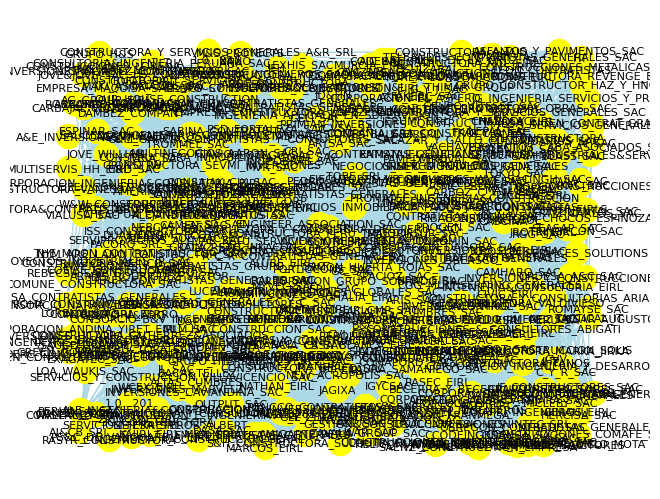

In [4]:
nx.draw_random(EmpresaNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Uy, se ve muy mal, hay que arreglarlo

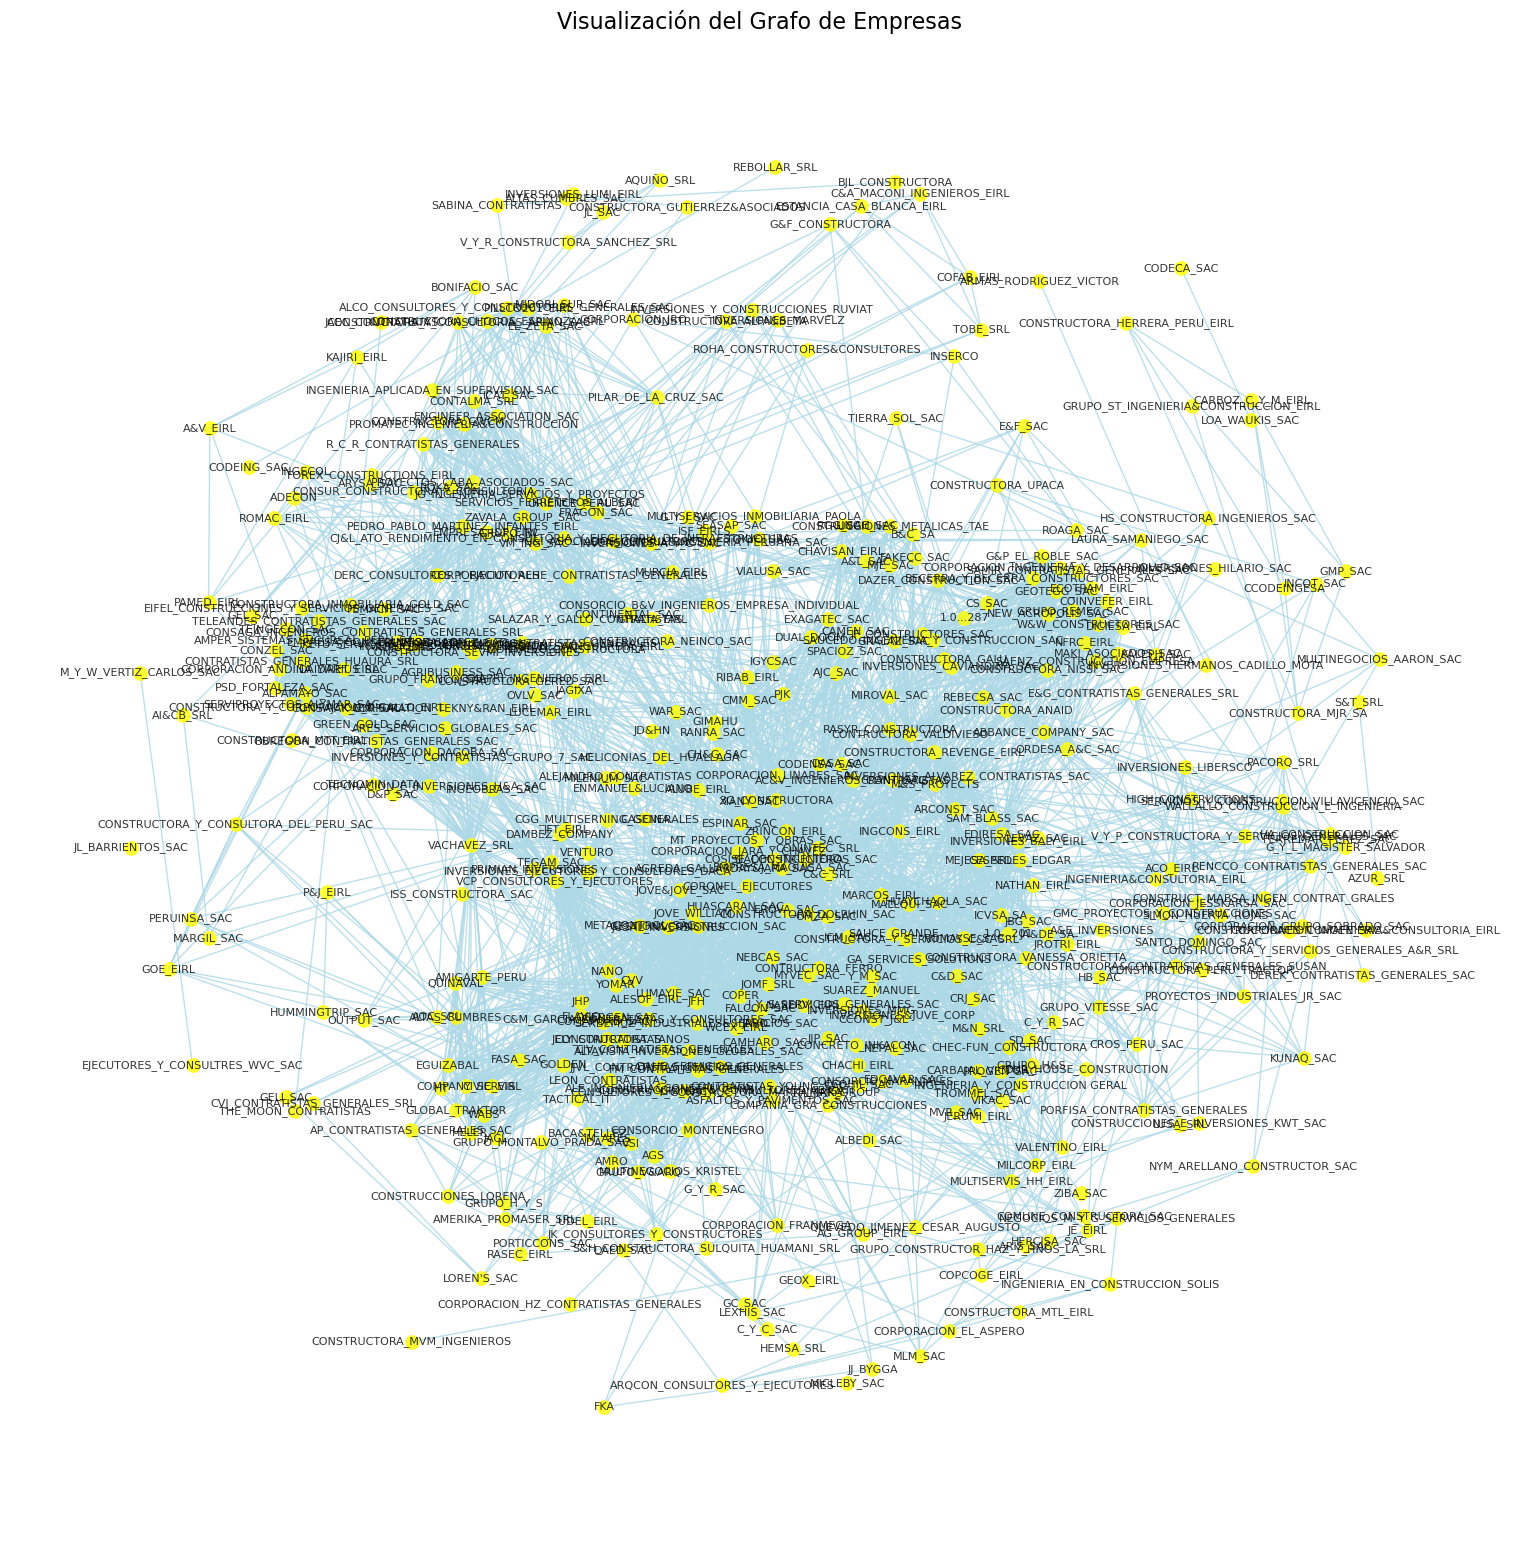

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15)) 
pos = nx.spring_layout(EmpresaNet, k=0.5)  

nx.draw(
    EmpresaNet,
    pos,
    node_color='yellow',
    edge_color='lightblue',
    with_labels=True,
    font_size=8,
    node_size=100,  # Ajusta el tamaño del nodo
    alpha=0.8,  # Ajustar la opacidad
    linewidths=0.5,  # Ajustar el ancho de los bordes
)

plt.title("Visualización del Grafo de Empresas", fontsize=16)
plt.axis('off')  
plt.show()

Esto incluye las relaciones con uno mismo, debemos eliminar eso

In [6]:
EmpresaNet.remove_edges_from(nx.selfloop_edges(EmpresaNet))

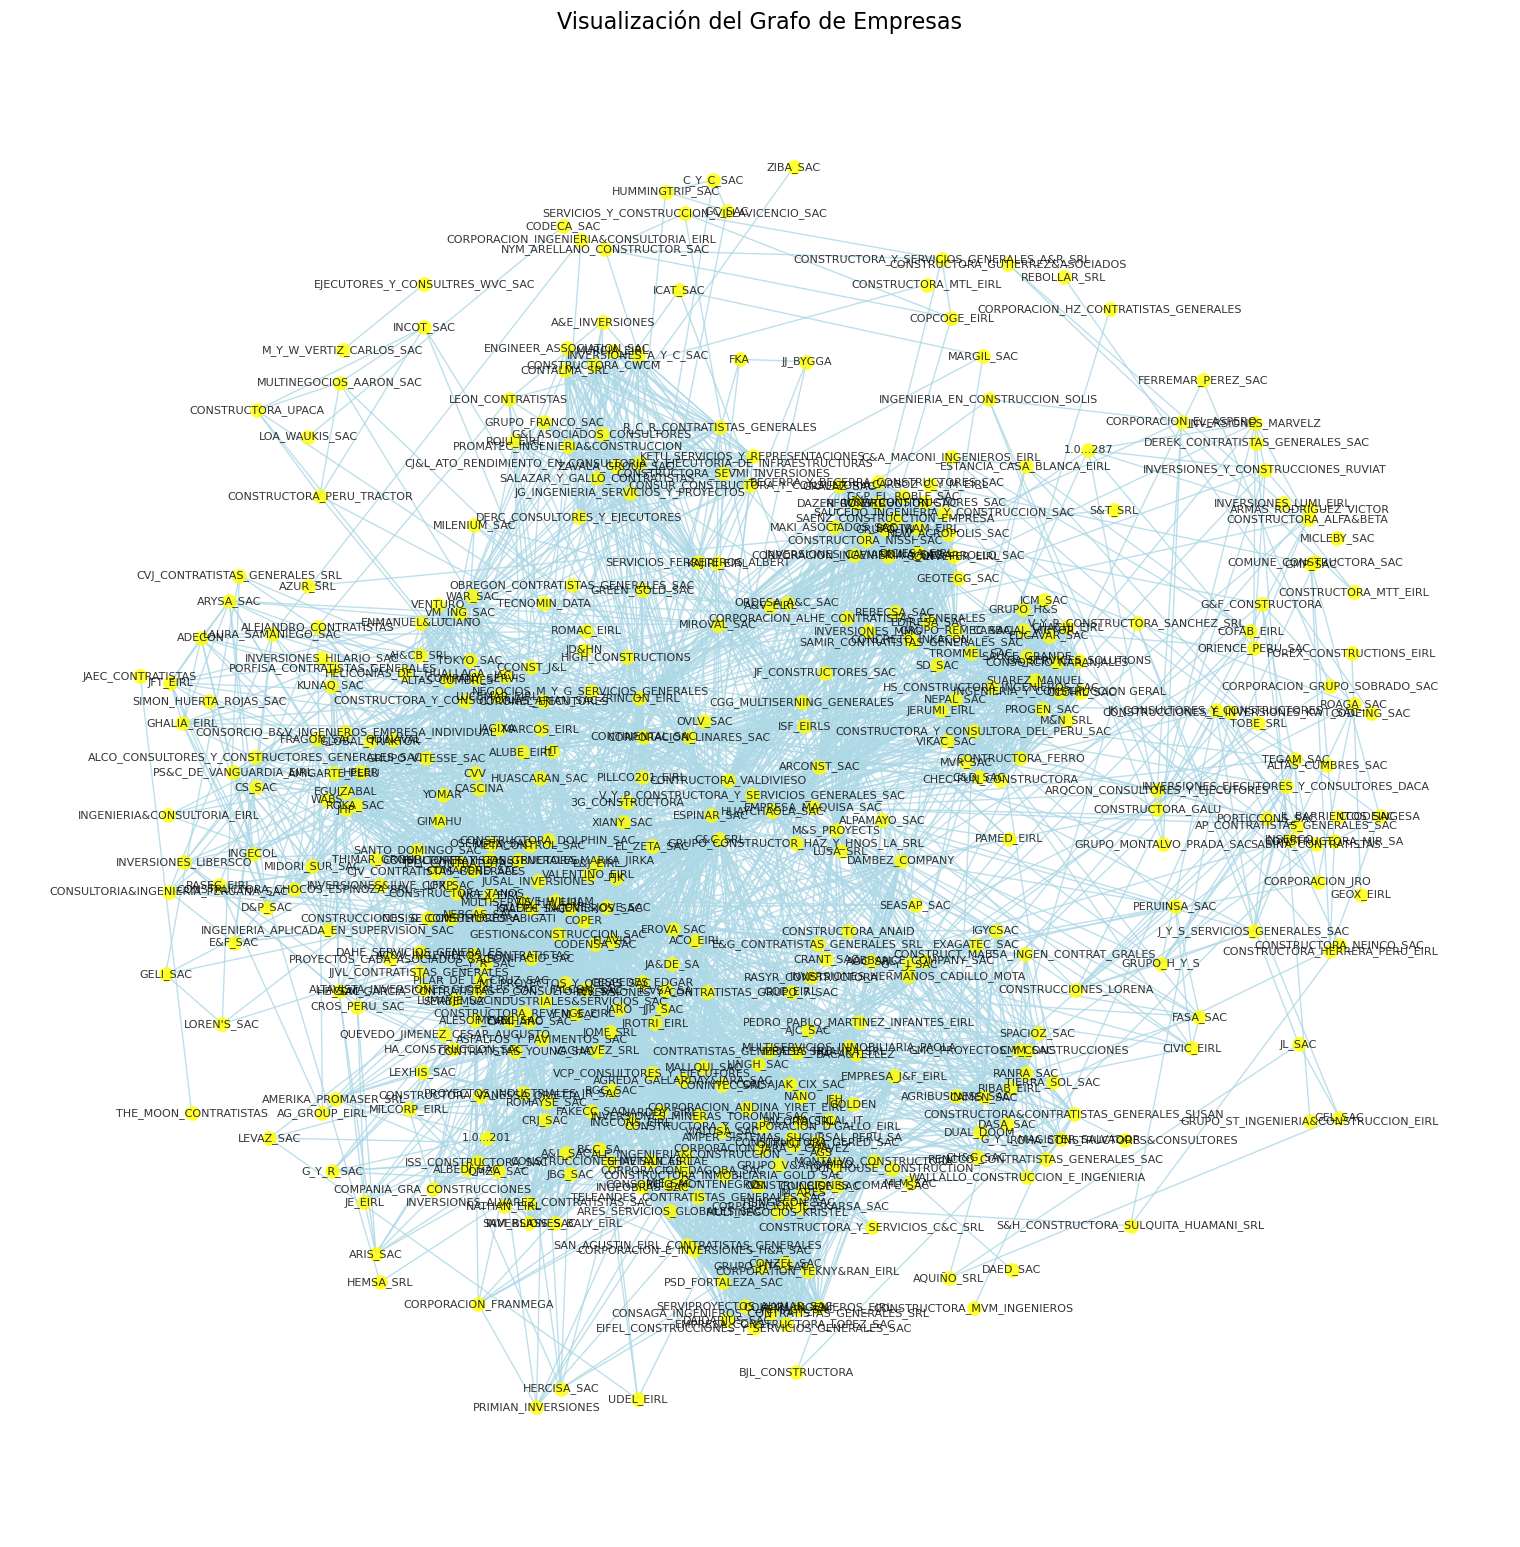

In [7]:
plt.figure(figsize=(15, 15)) 
pos = nx.spring_layout(EmpresaNet, k=0.5)  

nx.draw(
    EmpresaNet,
    pos,
    node_color='yellow',
    edge_color='lightblue',
    with_labels=True,
    font_size=8,
    node_size=100,  # Ajusta el tamaño del nodo
    alpha=0.8,  # Ajustar la opacidad
    linewidths=0.5,  # Ajustar el ancho de los bordes
)

plt.title("Visualización del Grafo de Empresas", fontsize=16)
plt.axis('off')  
plt.show()

### Exploramos

In [8]:
type(EmpresaNet)

networkx.classes.graph.Graph

In [9]:
len(EmpresaNet.nodes),len(EmpresaNet.edges) #edges es aristas

(444, 4582)

In [10]:
nx.is_connected(EmpresaNet)

False

In [11]:
len(list(nx.connected_components(EmpresaNet)))

21

Hay 21 grupos de nodos dentro del grafo que están interconectados entre sí, pero que no tienen conexiones con nodos de otros grupos. Esto indica que la red es fragmentada.

In [12]:
[len(c) for c in sorted(nx.connected_components(EmpresaNet), key=len, reverse=True)]

[390, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]

La presencia de estos pequeños componentes indica que hay nodos en el grafo que están aislados o que forman grupos muy pequeños que no están conectados al componente principal. 

In [13]:
list(nx.isolates(EmpresaNet))

['ALTAS_CUMBRES_SAC', 'MICLEBY_SAC', 'JL_BARRIENTOS_SAC']

#### Distancias

In [14]:
largest_cc_nodes = max(nx.connected_components(EmpresaNet), key=len)
EmpresaNet_largest=EmpresaNet.subgraph(largest_cc_nodes)

nx.diameter(EmpresaNet_largest)

6

Un diámetro de 6 sugiere que la mayoría de los nodos en este componente (390 nodos) están bastante conectados entre sí. No hay nodos que estén muy lejanos unos de otros.

In [15]:
# geodesics - indican las distancias más cortas entre los nodos
geodesics = dict(nx.all_pairs_shortest_path_length(EmpresaNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in EmpresaNet.nodes] for n in EmpresaNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=EmpresaNet.nodes, columns=EmpresaNet.nodes)

# we get
MatrixGeo_DF

ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  \
ZRINCON_EIRL                    0.0          1.0              1.0   
MIROVAL_SAC                     1.0          0.0              1.0   
METACONTROL_SAC                 1.0          1.0              0.0   
CORONEL_EJECUTORES              1.0          1.0              1.0   
WAR_SAC                         1.0          1.0              1.0   
...                             ...          ...              ...   
W&W_CONSTRUCTORES_SAC           1.0          1.0              2.0   
GEOTEGG_SAC                     1.0          1.0              2.0   
MAKI_ASOCIADOS_SAC              1.0          1.0              2.0   
COINVEFER_EIRL                  1.0          1.0              2.0   
G&P_EL_ROBLE_SAC                1.0          1.0              2.0   

                       CORONEL_EJECUTORES  WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  \
ZRINCON_EIRL                          1.0      1.0     1.0             1.0   
MIROVAL_SAC                           1.0      1.0     1.0             1.0   
METACONTROL_SAC                       1.0      1.0     1.0             1.0   
CORONEL_EJECUTORES                    0.0      1.0     1.0             1.0   
WAR_SAC                               1.0      0.0     1.0             1.0   
...                                   ...      ...     ...             ...   
W&W_CONSTRUCTORES_SAC                 2.0      2.0     2.0             2.0   
GEOTEGG_SAC                           2.0      2.0     2.0             2.0   
MAKI_ASOCIADOS_SAC                    2.0      2.0     2.0             2.0   
COINVEFER_EIRL                        2.0      2.0     2.0             2.0   
G&P_EL_ROBLE_SAC                      2.0      2.0     2.0             2.0   

                       JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  JD&HN  ...  \
ZRINCON_EIRL              1.0                       1.0    1.0  ...   
MIROVAL_SAC               1.0                       1.0    1.0  ...   
METACONTROL_SAC           1.0                       1.0    1.0  ...   
CORONEL_EJECUTORES        1.0                       1.0    1.0  ...   
WAR_SAC                   1.0                       1.0    1.0  ...   
...                       ...                       ...    ...  ...   
W&W_CONSTRUCTORES_SAC     2.0                       2.0    2.0  ...   
GEOTEGG_SAC               2.0                       2.0    2.0  ...   
MAKI_ASOCIADOS_SAC        2.0                       2.0    2.0  ...   
COINVEFER_EIRL            2.0                       2.0    2.0  ...   
G&P_EL_ROBLE_SAC          2.0                       2.0    2.0  ...   

                       INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  \
ZRINCON_EIRL                                  1.0                     1.0   
MIROVAL_SAC                                   1.0                     1.0   
METACONTROL_SAC                               2.0                     2.0   
CORONEL_EJECUTORES                            2.0                     2.0   
WAR_SAC                                       2.0                     2.0   
...                                           ...                     ...   
W&W_CONSTRUCTORES_SAC                         1.0                     1.0   
GEOTEGG_SAC                                   1.0                     1.0   
MAKI_ASOCIADOS_SAC                            1.0                     1.0   
COINVEFER_EIRL                                1.0                     1.0   
G&P_EL_ROBLE_SAC                              1.0                     1.0   

                       GRALAZ_SAC  ECOTRAM_EIRL  \
ZRINCON_EIRL                  1.0           1.0   
MIROVAL_SAC                   1.0           1.0   
METACONTROL_SAC               2.0           2.0   
CORONEL_EJECUTORES            2.0           2.0   
WAR_SAC                       2.0           2.0   
...                           ...           ...   
W&W_CONSTRUCTORES_SAC         1.0           1.0   
GEOTEGG_SAC                   1.0           1.0   
MAKI_ASOCIADOS_SAC  

In [16]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

freq
valor         
0.0      444.0
1.0     9164.0
2.0    56896.0
3.0    65758.0
4.0    18308.0
5.0     1654.0
6.0       56.0
NaN    44856.0

La presencia de un número considerable de pares con distancia NaN indica que hay grupos dentro del grafo que no están interconectados, lo que puede reflejar una fragmentación en la red, como mencionamos anteriormente.

In [17]:
import warnings
warnings.filterwarnings('ignore')

MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  \
ZRINCON_EIRL                      0            1                1   
MIROVAL_SAC                       1            0                1   
METACONTROL_SAC                   1            1                0   
CORONEL_EJECUTORES                1            1                1   
WAR_SAC                           1            1                1   
...                             ...          ...              ...   
W&W_CONSTRUCTORES_SAC             1            1                1   
GEOTEGG_SAC                       1            1                1   
MAKI_ASOCIADOS_SAC                1            1                1   
COINVEFER_EIRL                    1            1                1   
G&P_EL_ROBLE_SAC                  1            1                1   

                       CORONEL_EJECUTORES  WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  \
ZRINCON_EIRL                            1        1       1               1   
MIROVAL_SAC                             1        1       1               1   
METACONTROL_SAC                         1        1       1               1   
CORONEL_EJECUTORES                      0        1       1               1   
WAR_SAC                                 1        0       1               1   
...                                   ...      ...     ...             ...   
W&W_CONSTRUCTORES_SAC                   1        1       1               1   
GEOTEGG_SAC                             1        1       1               1   
MAKI_ASOCIADOS_SAC                      1        1       1               1   
COINVEFER_EIRL                          1        1       1               1   
G&P_EL_ROBLE_SAC                        1        1       1               1   

                       JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  JD&HN  ...  \
ZRINCON_EIRL                1                         1      1  ...   
MIROVAL_SAC                 1                         1      1  ...   
METACONTROL_SAC             1                         1      1  ...   
CORONEL_EJECUTORES          1                         1      1  ...   
WAR_SAC                     1                         1      1  ...   
...                       ...                       ...    ...  ...   
W&W_CONSTRUCTORES_SAC       1                         1      1  ...   
GEOTEGG_SAC                 1                         1      1  ...   
MAKI_ASOCIADOS_SAC          1                         1      1  ...   
COINVEFER_EIRL              1                         1      1  ...   
G&P_EL_ROBLE_SAC            1                         1      1  ...   

                       INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  \
ZRINCON_EIRL                                    1                       1   
MIROVAL_SAC                                     1                       1   
METACONTROL_SAC                                 1                       1   
CORONEL_EJECUTORES                              1                       1   
WAR_SAC                                         1                       1   
...                                           ...                     ...   
W&W_CONSTRUCTORES_SAC                           1                       1   
GEOTEGG_SAC                                     1                       1   
MAKI_ASOCIADOS_SAC                              1                       1   
COINVEFER_EIRL                                  1                       1   
G&P_EL_ROBLE_SAC                                1                       1   

                       GRALAZ_SAC  ECOTRAM_EIRL  \
ZRINCON_EIRL                    1             1   
MIROVAL_SAC                     1             1   
METACONTROL_SAC                 1             1   
CORONEL_EJECUTORES              1             1   
WAR_SAC                         1             1   
...                           ...           ...   
W&W_CONSTRUCTORES_SAC           1             1   
GEOTEGG_SAC                     1             1   
MAKI_ASOCIADOS_SAC  

In [18]:
# connectedness
nNodes=len(EmpresaNet_largest.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

1.0008305319359303

In [19]:
# geodesics
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(EmpresaNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in EmpresaNet_largest.nodes] for n in EmpresaNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=EmpresaNet_largest.nodes, columns=EmpresaNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  \
ZRINCON_EIRL                      0            1                1   
MIROVAL_SAC                       1            0                1   
METACONTROL_SAC                   1            1                0   
CORONEL_EJECUTORES                1            1                1   
WAR_SAC                           1            1                1   
...                             ...          ...              ...   
W&W_CONSTRUCTORES_SAC             1            1                2   
GEOTEGG_SAC                       1            1                2   
MAKI_ASOCIADOS_SAC                1            1                2   
COINVEFER_EIRL                    1            1                2   
G&P_EL_ROBLE_SAC                  1            1                2   

                       CORONEL_EJECUTORES  WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  \
ZRINCON_EIRL                            1        1       1               1   
MIROVAL_SAC                             1        1       1               1   
METACONTROL_SAC                         1        1       1               1   
CORONEL_EJECUTORES                      0        1       1               1   
WAR_SAC                                 1        0       1               1   
...                                   ...      ...     ...             ...   
W&W_CONSTRUCTORES_SAC                   2        2       2               2   
GEOTEGG_SAC                             2        2       2               2   
MAKI_ASOCIADOS_SAC                      2        2       2               2   
COINVEFER_EIRL                          2        2       2               2   
G&P_EL_ROBLE_SAC                        2        2       2               2   

                       JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  JD&HN  ...  \
ZRINCON_EIRL                1                         1      1  ...   
MIROVAL_SAC                 1                         1      1  ...   
METACONTROL_SAC             1                         1      1  ...   
CORONEL_EJECUTORES          1                         1      1  ...   
WAR_SAC                     1                         1      1  ...   
...                       ...                       ...    ...  ...   
W&W_CONSTRUCTORES_SAC       2                         2      2  ...   
GEOTEGG_SAC                 2                         2      2  ...   
MAKI_ASOCIADOS_SAC          2                         2      2  ...   
COINVEFER_EIRL              2                         2      2  ...   
G&P_EL_ROBLE_SAC            2                         2      2  ...   

                       INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  \
ZRINCON_EIRL                                    1                       1   
MIROVAL_SAC                                     1                       1   
METACONTROL_SAC                                 2                       2   
CORONEL_EJECUTORES                              2                       2   
WAR_SAC                                         2                       2   
...                                           ...                     ...   
W&W_CONSTRUCTORES_SAC                           1                       1   
GEOTEGG_SAC                                     1                       1   
MAKI_ASOCIADOS_SAC                              1                       1   
COINVEFER_EIRL                                  1                       1   
G&P_EL_ROBLE_SAC                                1                       1   

                       GRALAZ_SAC  ECOTRAM_EIRL  \
ZRINCON_EIRL                    1             1   
MIROVAL_SAC                     1             1   
METACONTROL_SAC                 2             2   
CORONEL_EJECUTORES              2             2   
WAR_SAC                         2             2   
...                           ...           ...   
W&W_CONSTRUCTORES_SAC           1             1   
GEOTEGG_SAC                     1             1   
MAKI_ASOCIADOS_SAC  

In [20]:
# reachability
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

ZRINCON_EIRL  MIROVAL_SAC  METACONTROL_SAC  \
ZRINCON_EIRL                      0            1                1   
MIROVAL_SAC                       1            0                1   
METACONTROL_SAC                   1            1                0   
CORONEL_EJECUTORES                1            1                1   
WAR_SAC                           1            1                1   
...                             ...          ...              ...   
W&W_CONSTRUCTORES_SAC             1            1                1   
GEOTEGG_SAC                       1            1                1   
MAKI_ASOCIADOS_SAC                1            1                1   
COINVEFER_EIRL                    1            1                1   
G&P_EL_ROBLE_SAC                  1            1                1   

                       CORONEL_EJECUTORES  WAR_SAC  GIMAHU  HUAYCHAOLA_SAC  \
ZRINCON_EIRL                            1        1       1               1   
MIROVAL_SAC                             1        1       1               1   
METACONTROL_SAC                         1        1       1               1   
CORONEL_EJECUTORES                      0        1       1               1   
WAR_SAC                                 1        0       1               1   
...                                   ...      ...     ...             ...   
W&W_CONSTRUCTORES_SAC                   1        1       1               1   
GEOTEGG_SAC                             1        1       1               1   
MAKI_ASOCIADOS_SAC                      1        1       1               1   
COINVEFER_EIRL                          1        1       1               1   
G&P_EL_ROBLE_SAC                        1        1       1               1   

                       JAGIXA  CONSTRUCTORA_DOLPHIN_SAC  JD&HN  ...  \
ZRINCON_EIRL                1                         1      1  ...   
MIROVAL_SAC                 1                         1      1  ...   
METACONTROL_SAC             1                         1      1  ...   
CORONEL_EJECUTORES          1                         1      1  ...   
WAR_SAC                     1                         1      1  ...   
...                       ...                       ...    ...  ...   
W&W_CONSTRUCTORES_SAC       1                         1      1  ...   
GEOTEGG_SAC                 1                         1      1  ...   
MAKI_ASOCIADOS_SAC          1                         1      1  ...   
COINVEFER_EIRL              1                         1      1  ...   
G&P_EL_ROBLE_SAC            1                         1      1  ...   

                       INVERSIONES_CAVIANDINA_SAC  DAZER_CONSTRUCTION_SAC  \
ZRINCON_EIRL                                    1                       1   
MIROVAL_SAC                                     1                       1   
METACONTROL_SAC                                 1                       1   
CORONEL_EJECUTORES                              1                       1   
WAR_SAC                                         1                       1   
...                                           ...                     ...   
W&W_CONSTRUCTORES_SAC                           1                       1   
GEOTEGG_SAC                                     1                       1   
MAKI_ASOCIADOS_SAC                              1                       1   
COINVEFER_EIRL                                  1                       1   
G&P_EL_ROBLE_SAC                                1                       1   

                       GRALAZ_SAC  ECOTRAM_EIRL  \
ZRINCON_EIRL                    1             1   
MIROVAL_SAC                     1             1   
METACONTROL_SAC                 1             1   
CORONEL_EJECUTORES              1             1   
WAR_SAC                         1             1   
...                           ...           ...   
W&W_CONSTRUCTORES_SAC           1             1   
GEOTEGG_SAC                     1             1   
MAKI_ASOCIADOS_SAC  

Elaboramos la matriz de alcance, si hay una conexión (distancia > 0), el valor es 1, y si no hay conexión, el valor es 0.

In [21]:
# connectedness
nNodes=len(EmpresaNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

1.0

El componente más largo, el de 390 nodos, está altamente conectado. 

#### Density

In [22]:
nx.density(EmpresaNet_largest)

0.05958737064135522

#### Centralidad

In [23]:
enterpriseMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(EmpresaNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(EmpresaNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(EmpresaNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
enterpriseMeasures

Degree  Closeness  Betweenness
ZRINCON_EIRL           0.197943   0.476132     0.032889
MIROVAL_SAC            0.113111   0.420996     0.005088
METACONTROL_SAC        0.174807   0.496173     0.019790
CORONEL_EJECUTORES     0.087404   0.424672     0.004195
WAR_SAC                0.043702   0.386296     0.000000
...                         ...        ...          ...
W&W_CONSTRUCTORES_SAC  0.071979   0.401031     0.000000
GEOTEGG_SAC            0.071979   0.401031     0.000000
MAKI_ASOCIADOS_SAC     0.071979   0.401031     0.000000
COINVEFER_EIRL         0.071979   0.401031     0.000000
G&P_EL_ROBLE_SAC       0.071979   0.401031     0.000000

[390 rows x 3 columns]

##### ¿Qué hemos calculado?
###### Degree
El grado de un nodo es la cantidad de conexiones (o aristas) que tiene con otros nodos en la red. Un alto grado indica que el nodo está muy conectado y, por lo tanto, podría ser considerado importante o influente en la red. Un bajo grado sugiere que el nodo tiene pocas conexiones y podría ser menos relevante en términos de conectividad.
###### Closeness
La centralidad de cercanía mide qué tan cerca está un nodo de todos los demás nodos en la red. Un alto valor de cercanía significa que un nodo puede acceder rápidamente a otros nodos en la red, lo que puede ser beneficioso para la difusión de información o recursos. Un bajo valor de cercanía sugiere que el nodo está relativamente lejos de otros, lo que podría limitar su capacidad de interactuar eficientemente dentro de la red.
###### Betweenness
La centralidad de intermediación mide cuántas veces un nodo actúa como intermediario en el camino más corto entre otros nodos. Un alto valor de intermediación indica que un nodo tiene un papel crucial en conectar diferentes partes de la red. Un bajo valor de intermediación sugiere que el nodo no desempeña un papel importante en la conexión de otros nodos y, por lo tanto, puede ser menos influyente en términos de control o mediación en la red.

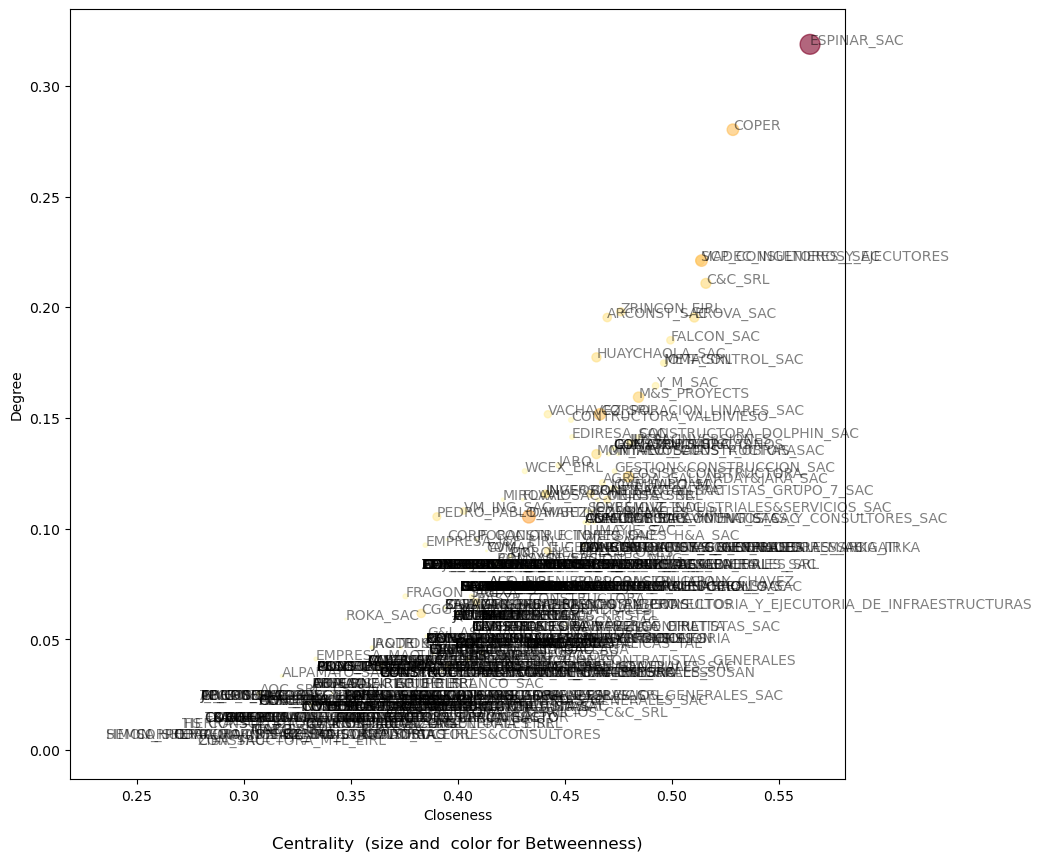

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(enterpriseMeasures.Closeness, enterpriseMeasures.Degree,s=1000*enterpriseMeasures.Betweenness,
           c=100*enterpriseMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(enterpriseMeasures.index,enterpriseMeasures.Closeness,enterpriseMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)

plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

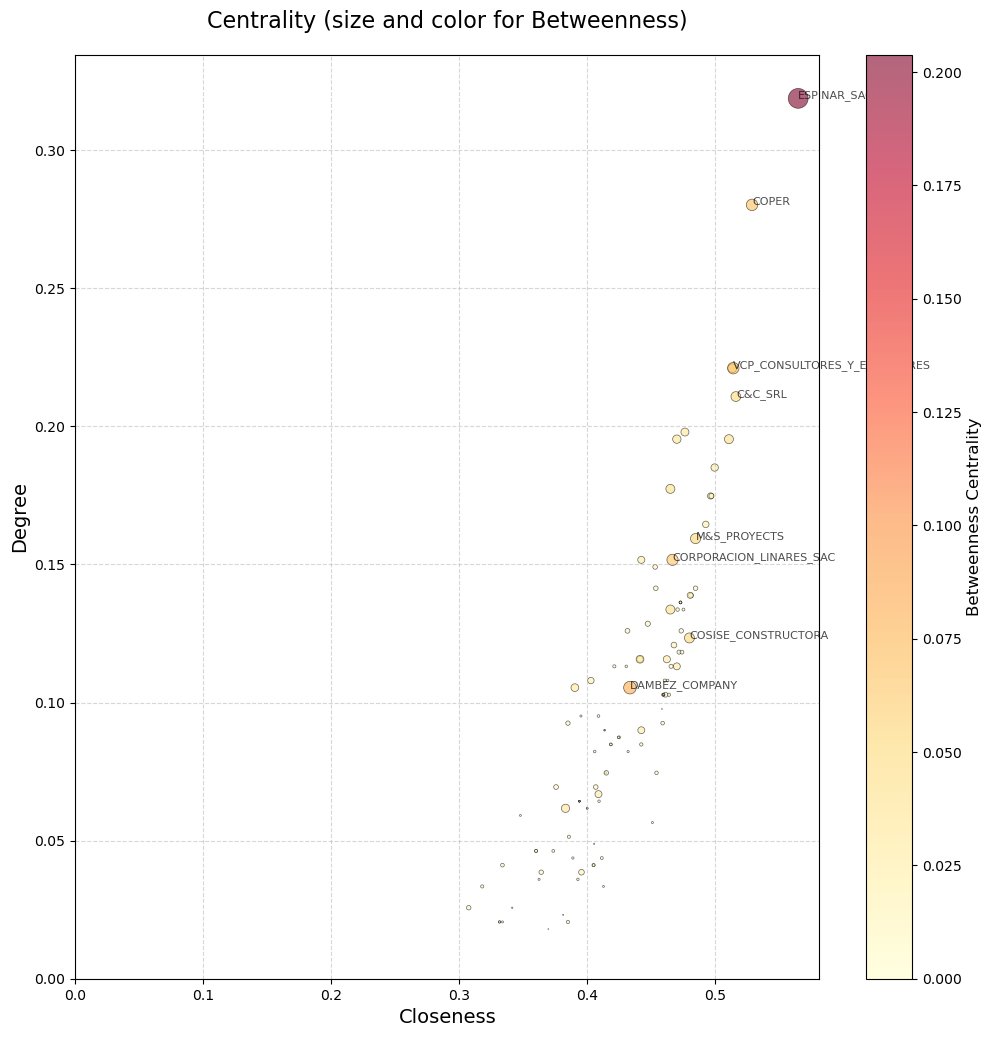

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))

scatter = ax.scatter(enterpriseMeasures.Closeness, enterpriseMeasures.Degree, 
                     s=1000 * enterpriseMeasures.Betweenness, 
                     c=enterpriseMeasures.Betweenness, cmap='YlOrRd', alpha=0.6, edgecolor='black', linewidth=0.5)

valsForAnnotate = zip(enterpriseMeasures.index, enterpriseMeasures.Closeness, enterpriseMeasures.Degree)

# Mostrar solo nombres que no se superpongan
for name, coordX, coordY in valsForAnnotate:
    if enterpriseMeasures.Betweenness.loc[name] > enterpriseMeasures.Betweenness.quantile(0.98):  # Top 2%
        ax.annotate(name, (coordX, coordY), fontsize=8, alpha=0.7)


plt.title("Centrality (size and color for Betweenness)", fontsize=16, y=1.02)
plt.xlabel("Closeness", fontsize=14)
plt.ylabel("Degree", fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Betweenness Centrality', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(left=0)  # Limitar el eje x si es necesario
plt.ylim(bottom=0)  # Limitar el eje y si es necesario

plt.show()

#### Comunidades

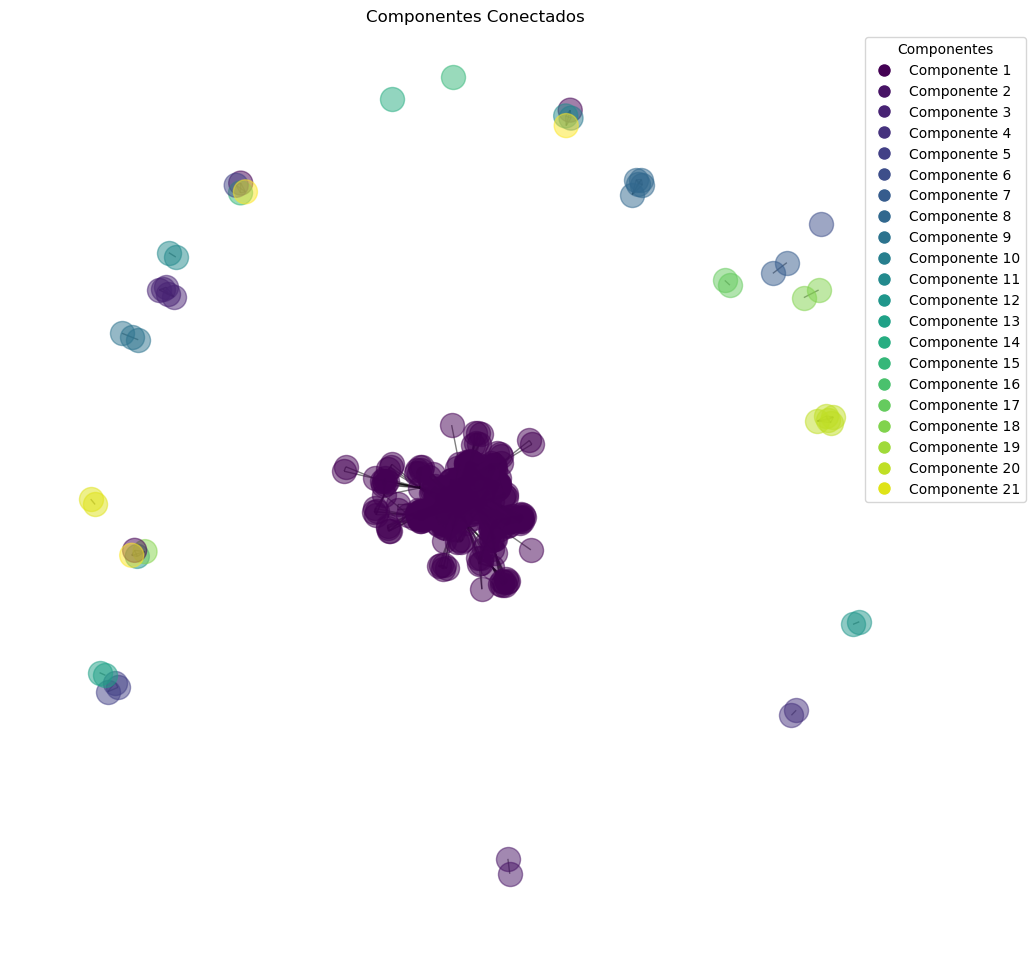

In [26]:
componentes = list(nx.connected_components(EmpresaNet))

pos = nx.spring_layout(EmpresaNet)  # Posiciones de los nodos
plt.figure(figsize=(12, 12))

# Dibuja cada componente con su color
for i, comp in enumerate(componentes):
    color = plt.cm.viridis(i / len(componentes))  # Diferentes colores para cada componente
    nx.draw_networkx_nodes(EmpresaNet, pos, nodelist=comp, node_color=color, alpha=0.5)

nx.draw_networkx_edges(EmpresaNet, pos, alpha=0.5)

# Ajustar la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Componente {i+1}',
                       markerfacecolor=plt.cm.viridis(i / len(componentes)), markersize=10)
           for i in range(len(componentes))]

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.1, 1), title="Componentes")

plt.title("Componentes Conectados")
plt.axis('off')  # Oculta los ejes
plt.show()

In [27]:
warnings.filterwarnings('ignore')
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

# Crea un objeto de red de Pyvis
net = Network(height="750px", width="100%", notebook=True)

# Encontrar componentes conectados
componentes = list(nx.connected_components(EmpresaNet))

# Dibuja cada componente con su color
for i, comp in enumerate(componentes):
    color = plt.cm.viridis(i / len(componentes))  # Diferentes colores para cada componente
    for node in comp:
        # Agregar nodos a la red interactiva
        net.add_node(str(node), label=str(node), color=f'rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})')

# Agregar bordes a la red
for u, v in EmpresaNet.edges():
    net.add_edge(str(u), str(v))

# Ajustar opciones de repulsión para que los nodos no se amontonen
net.repulsion(node_distance=300, spring_length=150)

# Mostrar la red
net.show("red_interactiva_componentes.html")

red_interactiva_componentes.html
